In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Loading Data

In [3]:
data = pd.read_csv('IMDB_Dataset.csv')

### Checking for NULL values

In [4]:
# Check for missing values
missing_values = data.isnull().any(axis=1)

# Print rows with missing values
print(data[missing_values])

Empty DataFrame
Columns: [review, sentiment]
Index: []


In [5]:
data.shape

(50000, 2)

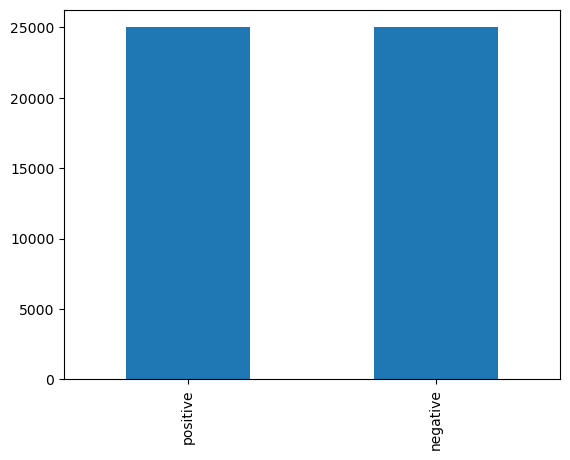

In [6]:
data['sentiment'].value_counts().plot(kind='bar');

# Processing the data 

In [7]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
     # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\S+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\S+', '', text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # text to lower
    text = text.lower()
    
    # tokenizing
    words = word_tokenize(text)
    
    words = [word for word in words if not word in stop_words and word.isalpha()]
    
    text = ' '.join(words)
    
    return text

data['review'] = data['review'].apply(preprocess_text)

data.to_csv('Imdb_cleanset.csv', index=False)


In [8]:
data.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


### Checking for duplicates

In [9]:
duplicated_count = data.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  422


In [10]:
data = data.drop_duplicates('review')

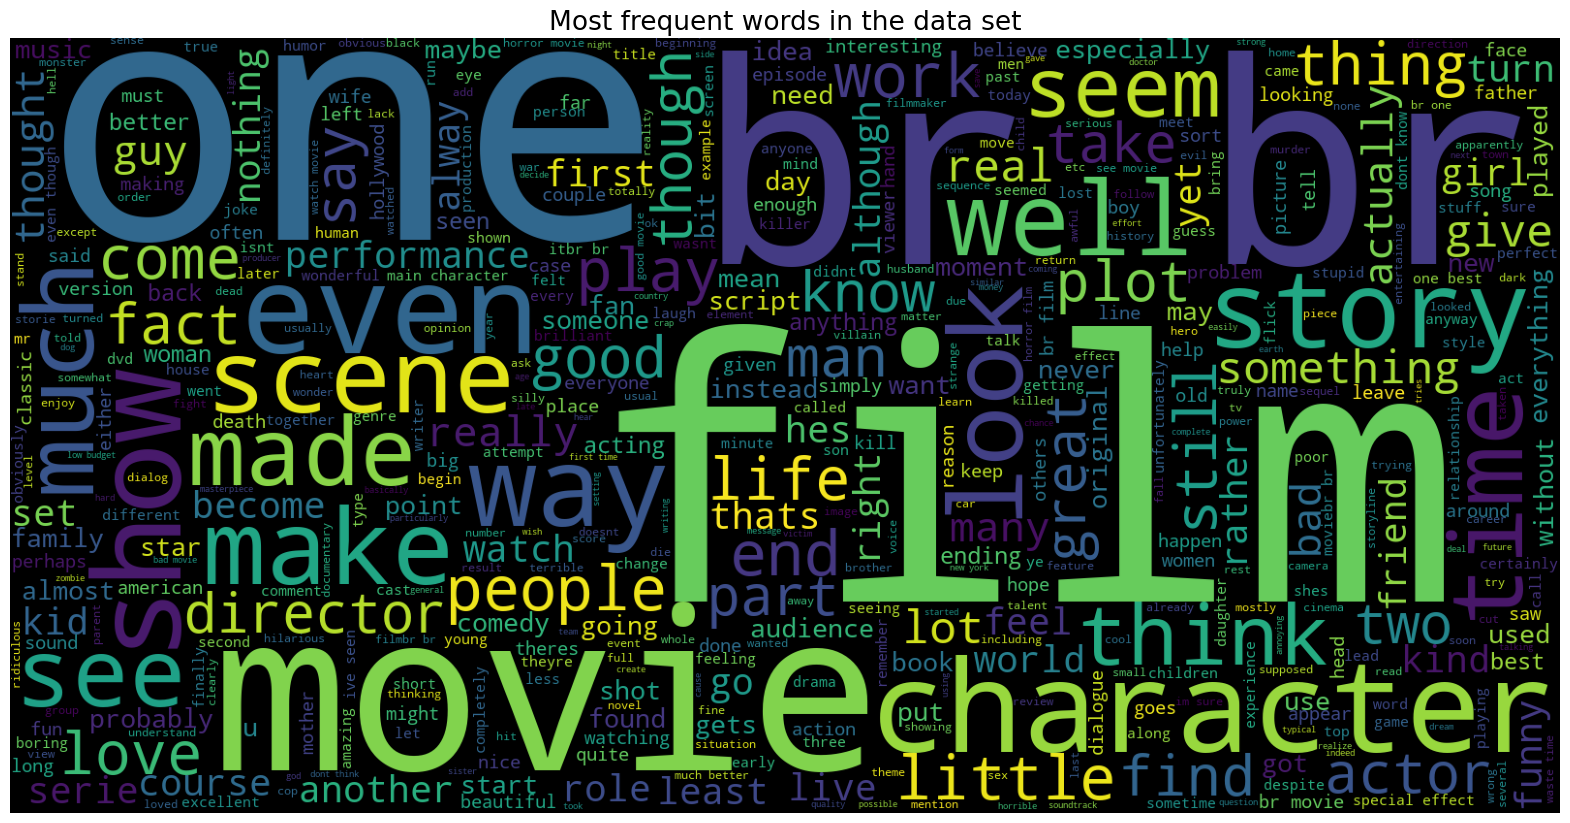

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join([word for word in data['review']])
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.figure(figsize=(20,15), facecolor='None')
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent words in the data set', fontsize = 19)
plt.show()

## Spliting data to training set and testing set

In [12]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# size of the training data
print("Training data size:", train_data.shape)

# size of the testing data
print("Testing data size:", test_data.shape)

Training data size: (39662, 2)
Testing data size: (9916, 2)


# Comparing performance interms of Accuracy, precision, and recall using machine learning algorithms

# Naïve Bayes

In [13]:

vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(train_data['review'])
test_vectors = vectorizer.transform(test_data['review'])

nb = MultinomialNB()
nb.fit(train_vectors, train_data['sentiment'])

nb_predictions = nb.predict(test_vectors)

nb_accuracy = accuracy_score(test_data['sentiment'], nb_predictions)
nb_precision = precision_score(test_data['sentiment'], nb_predictions, average='macro')
nb_recall = recall_score(test_data['sentiment'], nb_predictions, average='macro')

print('Naïve Bayes accuracy: {:.2f}%'.format(nb_accuracy*100))
print('Naïve Bayes precision:{:.2f}%'.format(nb_precision*100))
print('Naïve Bayes recall: {:.2f}%'.format(nb_recall*100))




Naïve Bayes accuracy: 85.75%
Naïve Bayes precision:85.77%
Naïve Bayes recall: 85.78%


# Support Vector Machine

In [14]:
tfidf_vectorizer = TfidfVectorizer()
train_tfidf_vectors = tfidf_vectorizer.fit_transform(train_data['review'])
test_tfidf_vectors = tfidf_vectorizer.transform(test_data['review'])

svm = LinearSVC()
svm.fit(train_tfidf_vectors, train_data['sentiment'])

svm_predictions = svm.predict(test_tfidf_vectors)

svm_accuracy = accuracy_score(test_data['sentiment'], svm_predictions)
svm_precision = precision_score(test_data['sentiment'], svm_predictions, average='macro')
svm_recall = recall_score(test_data['sentiment'], svm_predictions, average='macro')

print('Support Vector Machine accuracy:  {:.2f}%'.format(svm_accuracy*100))
print('Support Vector Machine precision: {:.2f}%'.format( svm_precision*100))
print('Support Vector Machine recall: {:.2f}%'.format(svm_recall*100))



Support Vector Machine accuracy:  89.49%
Support Vector Machine precision: 89.53%
Support Vector Machine recall: 89.46%


# Logistic Regression

In [15]:
lr = LogisticRegression()
lr.fit(train_tfidf_vectors, train_data['sentiment'])

lr_predictions = lr.predict(test_tfidf_vectors)

lr_accuracy = accuracy_score(test_data['sentiment'], lr_predictions)
lr_precision = precision_score(test_data['sentiment'], lr_predictions, average='macro')
lr_recall = recall_score(test_data['sentiment'], lr_predictions, average='macro')

print('Logistic Regression accuracy:{:.2f}%'.format(lr_accuracy*100))
print('Logistic Regression precision:{:.2f}%'.format( lr_precision*100))
print('Logistic Regression recall:{:.2f}%'.format( lr_recall*100))

Logistic Regression accuracy:89.42%
Logistic Regression precision:89.46%
Logistic Regression recall:89.39%


## Asking for user input and determining its sentiment 

In [ ]:
while True:
        comment = input('Enter your comment: ')
        if comment == 'quit':
            break
        user_vector = tfidf_vectorizer.transform([comment])

        prediction = lr.predict(user_vector)[0]

        print('Predicted sentiment:', prediction)

Enter your comment: planet earth is a good series
Predicted sentiment: positive
Enter your comment: Imdb has great movies and tv shows
Predicted sentiment: positive
